In [73]:
import tensorflow as tf
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets.cifar10 import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

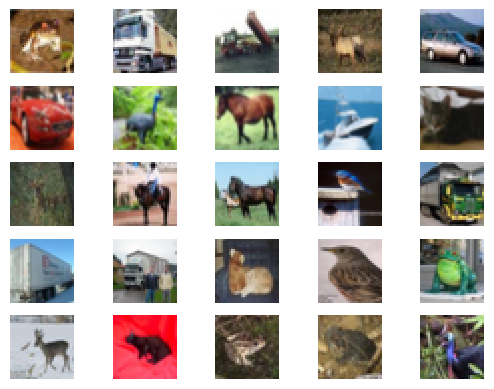

In [74]:
(trainX, trainy), (testX, testy) = load_data()
trainX, testX = trainX / 255.0, testX / 255.0

# plot 25 images
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(trainX[i])
plt.show()


In [75]:
trainX.shape


(50000, 32, 32, 3)

In [76]:
testX.shape

(10000, 32, 32, 3)

In [77]:
trainX[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

C:\Users\srika\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[5]')

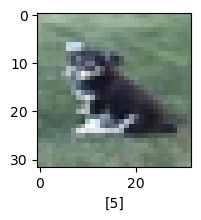

In [78]:
plt.figure(figsize=(15,2))
plt.imshow(trainX[70])
plt.xlabel(trainy[70])

In [79]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'frog')

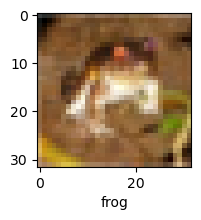

In [80]:
plt.figure(figsize=(15,2))
plt.imshow(trainX[0])
index = int(trainy[0])
plt.xlabel(classes[index])

In [81]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [83]:
history = model.fit(trainX, trainy, epochs=10, validation_data=(testX, testy))

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.7686 - accuracy: 0.3452 - val_loss: 1.1844 - val_accuracy: 0.5805
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1791 - accuracy: 0.5783 - val_loss: 1.0392 - val_accuracy: 0.6335
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9901 - accuracy: 0.6517 - val_loss: 0.9705 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8836 - accuracy: 0.6882 - val_loss: 0.9303 - val_accuracy: 0.6714
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8063 - accuracy: 0.7162 - val_loss: 0.8726 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7414 - accuracy: 0.7410 - val_loss: 0.9166 - val_accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6960 - accuracy: 0.7543 - val_loss: 0.8565 -

In [84]:
history

In [85]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1563}

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [87]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

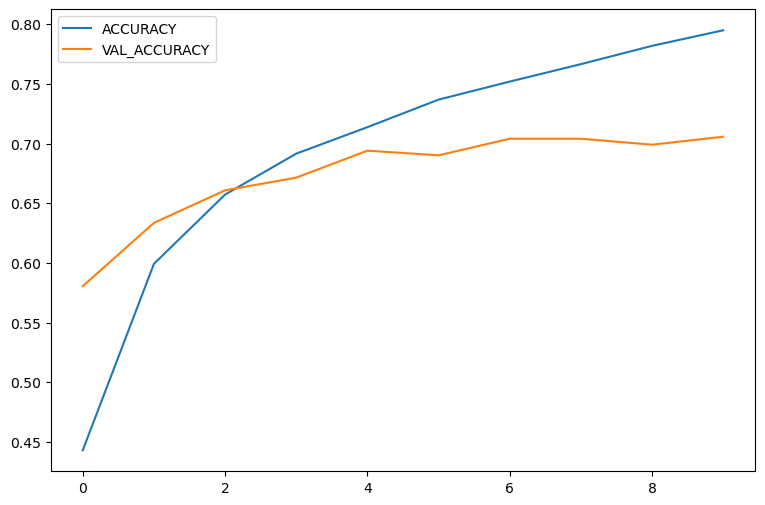

In [88]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='ACCURACY')
plt.plot(range(10),val_acc,label='VAL_ACCURACY')
plt.legend()


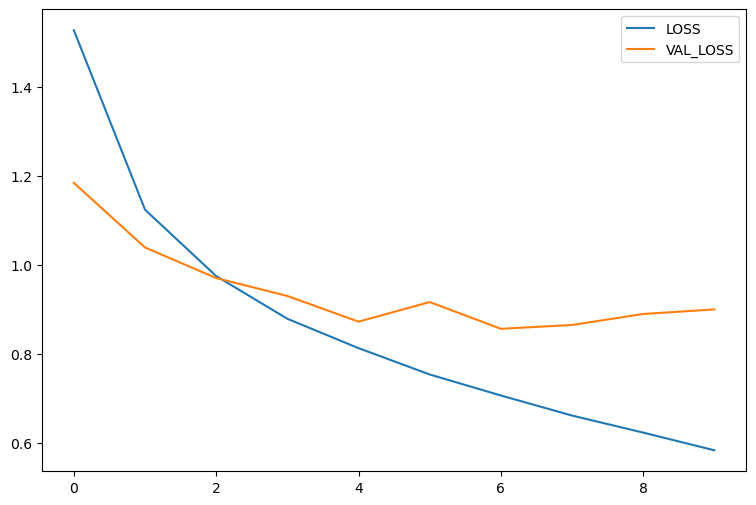

In [89]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(10),loss,label='LOSS')
plt.plot(range(10),val_loss,label='VAL_LOSS')
plt.legend()

In [90]:
model.evaluate(testX,testy)

313/313 [==============================] - 2s 6ms/step - loss: 0.9001 - accuracy: 0.7057


[0.9000639915466309, 0.7056999802589417]

In [91]:
y_pred = model.predict(testX)

In [92]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [93]:
classes[y_classes[0]]

'cat'

In [94]:
print(classification_report(testy,y_classes))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.62      0.61      0.61      1000
           3       0.58      0.44      0.50      1000
           4       0.62      0.74      0.67      1000
           5       0.72      0.52      0.61      1000
           6       0.78      0.77      0.78      1000
           7       0.82      0.71      0.76      1000
           8       0.69      0.89      0.78      1000
           9       0.69      0.84      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [95]:
conf_mat = confusion_matrix(testy,y_classes)

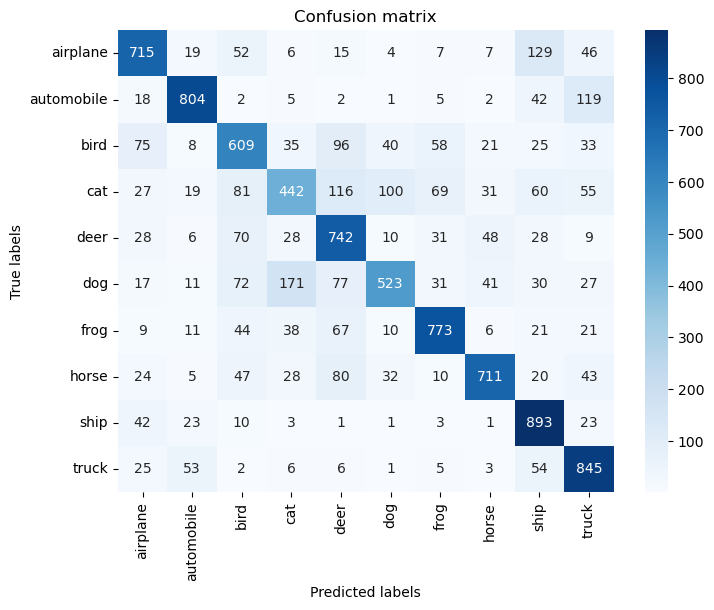

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [58]:
import os
model_version=max([int (i) for i in os.listdir("./models")+[0]])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets
